# DBSCAN算法
DBSCAN（Density-Based Spatial Clustering of Applications with Noise，具有噪声的基于密度的聚类方法）是一种基于密度的空间聚类算法。

该算法将具有足够密度的区域划分为簇，并在具有噪声的空间数据库中发现任意形状的簇，它将簇定义为密度相连的点的最大集合。

## 算法流程
1.选择参数：设定邻域半径（Eps）和最小点数（MinPts）。

2.标记核心点：如果一个点的Eps邻域内至少有MinPts个点，则标记为核心点。

3.密度直达：从核心点出发，将其邻域内的点标记为密度直达点。

4.密度相连：将所有密度直达点连接，形成簇。

5.处理噪声：未归入任何簇的点标记为噪声。

In [1]:
#导入需要的库
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
# numpy的默认使用科学计数法显示数据的改变办法,True是关闭科学计数显示
np.set_printoptions(suppress=True)

In [4]:
# 生成一个二维的示范分类数据集，形状类似于两个交错的半圆形月亮
#n_samples=300：生成300个样本点。
#noise=0.1：添加少量噪声到数据中，使得数据点不完全沿着理想的“月亮”形状分布。
#random_state=42：设置随机种子，确保每次运行代码时生成的数据都是一样的。
X, y = make_moons(n_samples=300, noise=0.1, random_state=42)
#X表示生成的具有两位特征的300行数据，y表示这三百个数据分别属于哪个类别
print(X)
print(y)

[[ 0.68298822 -0.34520334]
 [ 2.04099043 -0.13161467]
 [-0.13975154  0.4543905 ]
 [ 0.88574785  0.28634183]
 [ 1.18245853 -0.49771051]
 [ 1.01920826 -0.42546583]
 [ 0.38936159 -0.24711723]
 [-0.56038458  0.7126811 ]
 [ 0.90184352  0.05393087]
 [ 0.20674791  0.00620769]
 [ 1.32352331 -0.28917583]
 [ 0.38375871  0.85180238]
 [ 0.96912163 -0.48548734]
 [ 0.66990092  0.91933859]
 [ 0.12320759  0.0135339 ]
 [ 1.01678336 -0.55766876]
 [ 2.0082993   0.31643435]
 [ 0.72158032 -0.37257114]
 [-0.8560421   0.02181359]
 [ 0.18268528  0.2877987 ]
 [-0.05049922  1.01489642]
 [-0.84075184  0.53815027]
 [ 1.51040341 -0.45511096]
 [ 1.50815974 -0.41237818]
 [-0.76150586  0.84844919]
 [ 0.59141088  0.7822828 ]
 [ 1.83953008  0.09604244]
 [ 2.15248367  0.42861699]
 [ 0.06582952  0.22585647]
 [ 1.51971646 -0.27542117]
 [ 1.07278992  0.43368736]
 [ 0.04476547  0.25329227]
 [ 0.87235019  0.57813424]
 [ 0.83022662  0.31779393]
 [ 0.72385192 -0.31387619]
 [-0.83995588  0.55940687]
 [ 1.02090482 -0.01416638]
 

In [5]:
# 数据标准化
X = StandardScaler().fit_transform(X)

In [6]:
# 使用DBSCAN进行聚类
db = DBSCAN(eps=0.3, min_samples=5)
db.fit(X)

DBSCAN(eps=0.3)

In [9]:
# 获取聚类标签
#这里的标签是DBSCAN算法自动聚类生成的，跟上面生成数据的y没有关系。
#因此这里的0/1序列与上面的y相反，同时-1代表着离群点
labels = db.labels_
print(labels)

[ 0  0  0  1  0  0  0  1  1  0  0  1  0  1  0  0  0  0  1  0  1  1  0  0
  1  1  0  0  0  0  1  0  1  1  0  1  1  1  1  1  1  1  0  1  1  1  0  0
  1  0  0  1  0  1  0  0  1  1  0  1  0  1  1  0  0  1  1  0  1  0  1  1
  0  0  1  0  1  1  1  0  0  0  1  1  1  1  1  1  1  1  0  1  1  0  1  1
  0 -1  0  1  0  1  1  0  0  0  1  1  0  1  1  0  1  0  0  1  1  0  0  0
  1  0  0  0  1  0  1  1  0  0  1  1  0  1  0  0  0  0  0  1  1  1  0  1
 -1  0  1  1  1  1  0  1  0  0  0  0  0  1  0  1  0  0  1  1  1  1  0  0
  0  1  1  0  0  1  1  0  1  1  0  1  0  1  0  0  1  0  0  0  1  1  1  0
  0  0  0  1  0  0  1  0  1  1  1  0  0  0  0  1  1  1  1  0  1  1  0  1
  1  0  0  1  1  0  0  0  1  0  1  1  0  0  1  0  0  0  0  1  1  1  0  0
  0  0  0  1  0  1  0  0  0  1  1  1  1  1  1  1  1  1  0  1  1  1  0  1
  1  0  0  1  0  0  1  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  1  1
  0  1  1  0  1  0  1  0  1  1  0  1]


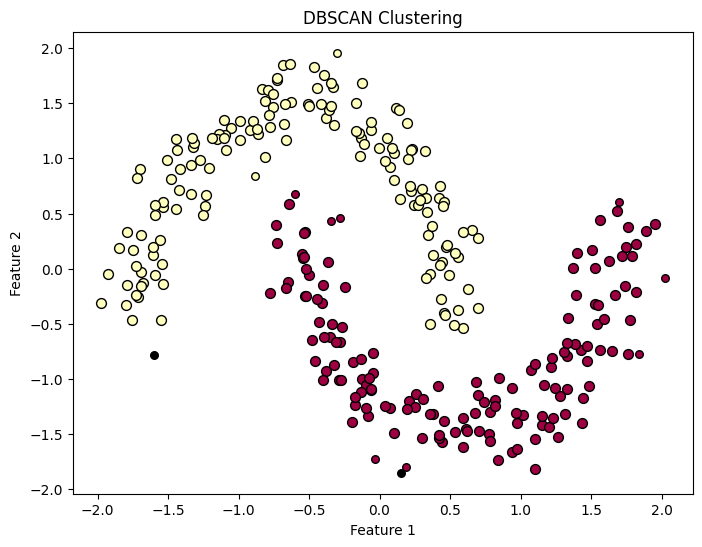

In [8]:
# 可视化结果
plt.figure(figsize=(8, 6))

# 绘制核心样本
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# 绘制不同簇的点
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # 噪声点用黑色表示
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    # 绘制核心点
    xy = X[class_member_mask & core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], marker='o', edgecolors='k')

    # 绘制非核心点
    xy = X[class_member_mask & ~core_samples_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=30, c=[col], marker='o', edgecolors='k')

plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()